# Проблема переобучения и борьба с ней

Недообучение- плохое качество на обучении и на новых данных

Переобучение - это хорошее качество на обучении и плохое на новых данных

## Как выявить переобучение

1) Отложенная выборка - данные, на которых не переобучались

2) Кросс-валидация - усложненный вариант отложенной выборки

3) Меры сложности модели

**Большие веса** - признак переобученности модели

# Регуляризация

**Регуляризация** - это способ борьбы с переобучением

Если веса в линейной модели большие, существует высокий риск переобучения. Чтобы бороться с этим, минимизируется уже не значение функционала ошибки $Q(a, X)$, а новый функционал, получаемый прибавлением регузяризатора.

Самый простой регуляризатор - **квадратичный регузяризатор**:

$$\Large ||w||^2 = \sum^d_{j=1}w^2_j$$

$$\Large Q(w, X) + \lambda||w||^2 -> min$$

При обучении будет учитываться, что не нужно слишком сильно увеличивать веса признаков

$\Large \lambda$ - коэффициент регуляризации. Чем больше $\lambda$, тем ниже сложность модели. Например, при очень больших значениях - он просто занулит признаки

## $L_1-регуляризатор$

$$||w||_1=\sum^d_{j=1}|w_j|$$

Не является гладким. Если применить этот регуляризатор, то некоторые признаки будут равны нулю. Этот регуляризатор производит отбор признаков и позволяет использовать в модели не все признаки, а только самые важные из них

# Оценивание качества алгоритмов

## Отложенная выборка

Самый простой способ оценить качество алгоритма — использование отложенной выборки. В этом случае
следует разбить выборку на две части: первая из двух частей будет использоваться для обучения алгоритма,
а вторая, тестовая выборка, — для оценки его качества, в том числе для нахождения доли ошибок в задаче
классификации, MSE (среднеквадратичной ошибки) в задаче регрессии и других мер качества в зависимости
от специфики задачи.

Преимуществом отложенной выборки является то, что обучать алгоритм приходится всего лишь один раз,
но при этом результат сильно зависит от того, как было произведено разбиение.

## Кросс-валидация

Выборка делится на $k$ блоков одинакового размера. Далее по очереди, каждый из этих блоков используется в качестве тестового, а все остальные - в качестве обучения.

После того, как каждый блок побывает в качестве тестового, будут получены $k$ показателей качества. В результате усреднения получается оценка качества по кросс-валидации

# Выбор гиперпараметров и сравнение алгоритмов

Гиперпараметрами называются такие параметры алгоритмов, которые не могут быть получены из обучающей выборки при обучении, поэтому их надо подбирать путем многократного обучения алгоритма.

## Сравнение разных алгоритмов

Действительно, пусть 1000 алгоритмов сравниваются по качеству на отложенной выборке. Каждый из
1000 алгоритмов, обученных на обучающей выборке, тестируется на отложенной, и в результате выбирается
лучший. Фактически на этом шаге отложенная выборка также становится своего рода обучающей, и возникает
проблема переобучения: из большого числа алгоритмов выбирается тот, который лучше всего ведет себя на
отложенной выборке, лучше подогнан под нее

## Улучшенная схема сравнения алгоритмов

Все данные нужно будет делить на 3 части (в случае использования отложенной выборки): обучение, валидация и контроль. Каждый из тысячи алгоритмов будет обучен на обучающей выборке, а
его качество будет измерено на валидационной. Алгоритм с наилучшим качеством будет проверен на тестовой
выборке, чтобы исключить переобучение и проверить алгоритм на адекватность. По сути именно тестовая
выборка будет играть роль новых данных.

Если предпочтительно использовать кросс-валидацию, то данные следует разбить на 2 части. Первая из
них будет использоваться для обучения алгоритмов и оценки качества с помощью кросс-валидации, после
чего лучший алгоритм будет проверен на адекватность на контрольной выборке.

---------
# Метрики качества
---

# Метрики качества в регрессии

## Среднеквадратичная ошибка

$$\Large MSE(a, X) = \frac{1}{\ell}\sum^l_{i=1}(a(x_i) - y_i)^2$$

**Плюсы**

1) Легко оптимизировать, так как функция гладкая. Используя, например, метод градиентного спуска

**Минусы**

1) Сильно штрафует за большие ошибки, так как отклонения возводятся в квадрат. Таким образом, штраф на выбросе будет очень большим, и алгоритм будет настраиваться на выбросы.

## Средняя абсолютная ошибка

$$\Large MAE(a, X) = \frac{1}{\ell}\sum^l_{i=1}|a(x_i) - y_i)|$$

**Минусы**

1) Сложнее минимизировать, так как у модуля не существует производной в нуле, функция негладкая.

**Плюсы**

1) Больше устойчивость к выбросам, так как штраф за отклонение значительно меньше

## Коэффициент детерминации

$$\Large R^2(a, X) = 1 - \frac{\sum^l_{i=1}(a(x_i)-y_i)^2}{\sum^l_{i=1}(y_i-\overline{y})}$$ 

Позволяет интерпретировать значение среднеквадратичной ошибки. Этот коэффициент показывает, какую долю дисперсии(разнообразия ответов) во всем целевом векторе $y$ модель смогла объяснить.

Для разумных моделей коэффициент детерминации лежит в следующих пределах:

$$\Large 0 \leq R^2 \leq 1$$

$R^2 = 1$ - идеальная модель

$R^2 = 0$ - модель на уровне оптимальной

$R^2 < 0$ - модель хуже оптимальной

***Оптимальным константым алгоритмом называется такой алгоритм, который возвращает всегда среднее значение ответов $\overline{y}$ для объектов обучающей выборки.***

## Несимметричные потери

До этого рассматривались **симметричные модели**, то есть такие, ***которые штрафуют как за недопрогноз, так
и за перепрогноз.*** Но существуют такие задачи, в которых эти ошибки имеют разную цену.

### Квантильная ошибка

$$\Large \rho_{\tau}(a, X) = \frac{1}{\ell}\sum^l_{i=1}((\tau-1)[y_i<a(x_i)] + \tau[y_i \geq a(x_i)])(y_i-a(x_i))$$

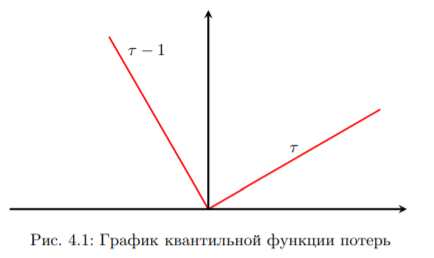

Параметр $\tau ∈ [0, 1]$ определяет то, за что нужно штрафовать сильнее — за недопрогноз или перепрогноз.
***Если $τ$ ближе к 1, штраф будет больше за недопрогноз, а если, наоборот, ближе к 0 — за перепрогноз.***

# Метрики качества классификации

## Доля правильных ответов

В задачах регрессии принято определять метрики таким образом, чтобы их нужно было минимизировать, тогда как в задачах классификации, наоборот, максимизировать:

$$\Large accuracy(a, X) = \frac{1}{\ell}\sum^l_{i=1}[a(x_i) = y_i]$$

**Недостатки**

1) Несбалансированные выборки

2) Цены ошибок не учитываются

# Точность и полнота

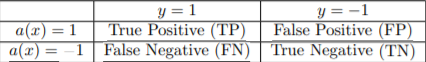

Когда алгоритм относит объект к классу +1, то говорят, что он срабатывает. 

**Если алгоритм сработал и объет действительно относится к классу $+1$ - верное срабатывание(true positive)**

**Если алгоритм сработал, а объект относится к классу $-1$ - ложное срабатывание(false positive)**

Если алгоритм дает ответ $-1$, говорят, что он пропускает объект.

**Если имеет место пропуска объекта $+1$ - ложный пропуск (false negative)**

**Если алгоритм пропускает объект класса $-1$ - истинный пропуск (true negative)**

$$\Large precision(a, X) = \frac{TP}{TP + FP}$$

Две популярные метрики - precision и recall. Первая показывает, как часто алгоритм предсказывает класс 1 и оказывается правым, а вторая - как много объектов класса 1 алгоритм нашел. 

***Точность показывает насколько можно доверять классификатору в случае срабатывания***

$$\Large recall(a, X) = \frac{TP}{TP + FN}$$

***Полнота на какой доле истинных объектов первого класса алгоритм срабатывает***

Точность показывает сколько из выделенных алгоритмом объектов на самом деле относится к классу 1.

Полнота показывает как много положительных объектов находит алгоритм.


---
# Объединение точности и полноты

## Арифметическое среднее

$$\Large A = \frac{1}{2}(precision + recall)$$

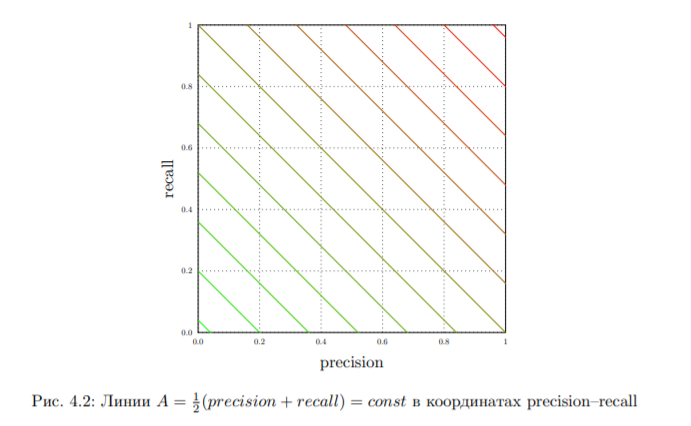

## Минимум

$$\Large M = min(precision, recall)$$

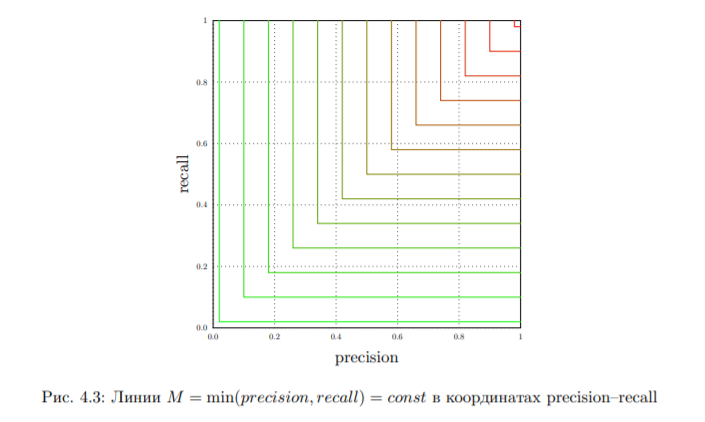

## F-мера

Сглаженный минимум

$$\Large F=\frac{2\cdot precision \cdot recall}{precision + recall}$$

## Расширенная F-мера

Если необходимо отдать предпочтение точности или полноте, следует использовать расширенную F-меру, в
которой есть параметр $β$:


$$\Large F=(1+\beta)^2\frac{precision \cdot recall}{\beta^2 \cdot precision + recall}$$

***При $\beta=1$ - обычная $F$-мера***

***При $\beta=0.5$ - важнее оказывается полнота***

***При $\beta=2$ - важнее оказывается точность***

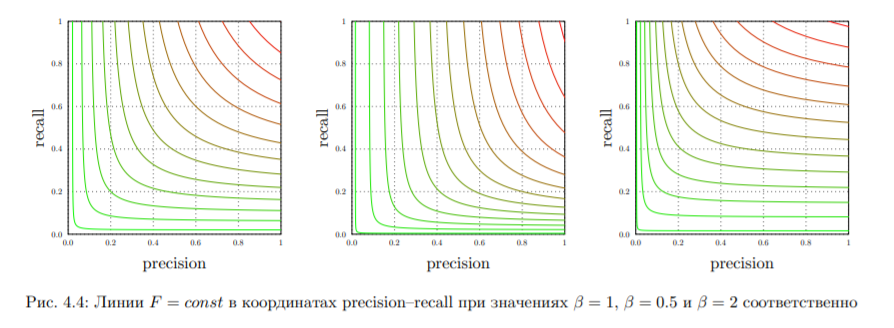

# Качество оценок принадлежности классу

Многие алгоритмы бинарной классификации устроены следующим образом: сначала вычисляется некоторое
вещественное число $b(x)$, которое сравнивается с порогом $t$.

$$\Large a(x) = [b(x) > t],$$

где $b(x)$ — оценка принадлежности классу $+1$. Другими словами, $b(x)$ выступает в роли некоторой оценки
уверенности, что $x$ принадлежит классу $+1$.

В случае линейного классификатора $a(x) = [<w, xi > t]$ оценка принадлежности классу $+1$ имеет вид
$b(x) = <w, xi>.$

***Часто бывает необходимо оценить качество именно оценки принадлежности, а порог выбирается позже из
соображений на точность или полноту.***


## PR-кривая

Первый способ оценки принадлежности классу основан на использовании кривой точности-полноты. По оси $X$ - полнота, по оси $Y$-точность. Каждой точке будет соответствовать классификатор с некоторым значением порога.

Для примера будет приведено построение PR-кривой для выборки из 6 объектов, три из которых относятся
к классу 1 и 3 — к классу 0. Соответствующий ей график:

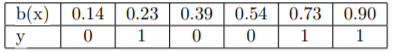

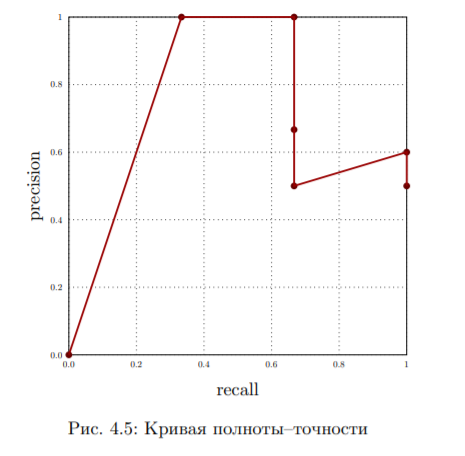

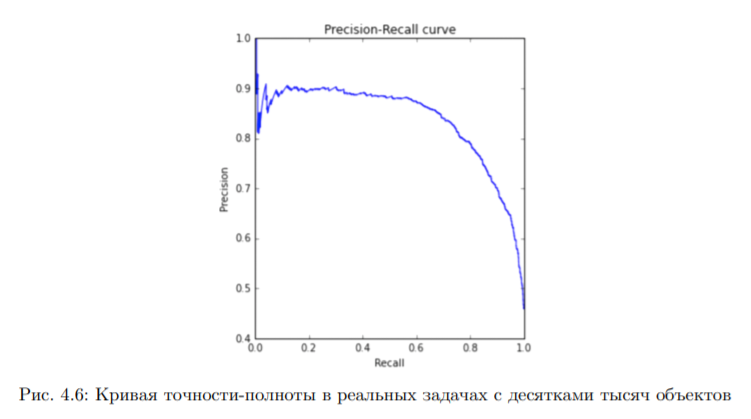

Следует отметить, что начинается PR-кривая всегда из точки $(0, 0)$, а заканчивается точной $(1, r)$, где $r$
— доля объектов класса 1.

В случае идеального классификатора, то есть если существует такой порог, что и точность, и полнота равны 100%, кривая будет проходить через точку (1, 1). ***Таким образом, чем ближе кривая пройдет к этой точке,
тем лучше оценки.*** *Площадь под этой кривой может быть хорошей мерой качества оценок принадлежности
к классу 1.* Такая метрика называется AUC–PRC, или площадь под PR-кривой.

## ROC-кривая

Второй способ измерить качество оценок принадлежности к классу 1 — ROC-кривая, которая строится в осях
$False\ Positive\ Rate\ (ось\ X)\ и\ True\ Positive\ Rate\ (ось\ Y )$:

$$\Large FPR = \frac{FP}{FP+TN}$$

$$\Large TPR = \frac{TP}{TP+FN}$$

ROC-кривая строится аналогично PR-кривой: постепенно рассматриваются случаи различных значений порогов и отмечаются точки на графике. Для упомянутой выше выборки ROC-кривая имеет следующий вид:

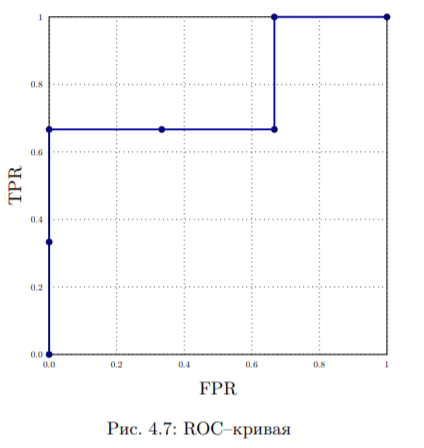

В случае с большой выборкой ROC-кривая выглядит следующим образом:

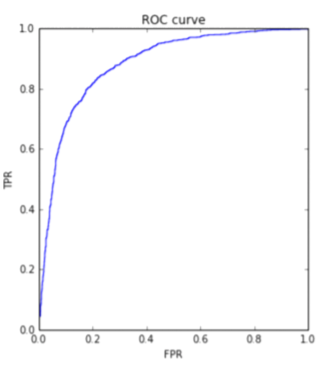

***Кривая стартует с точки (0, 0) и приходит в точку (1, 1). При этом, если существует идеальный классификатор, кривая должна пройти через точку (0, 1). Чем ближе кривая к этой точке, тем лучше будут оценки,
а площадь под кривой будет характеризовать качество оценок принадлежности к первому классу. Такая
метрика называется AUC–ROC,или площадь под ROC-кривой.***

## Особенности AUC-ROC

ROC-кривая строится на осях FPR и TPR, которые нормируются на размеры классов. Следовательно, при изменении баланса классов величина AUC-ROC, площадь под ROC кривой не изменится.

В случае идеального алгоритма AUC-ROC = 1, в случае наихудшего - 1/2.

Значение AUC−ROC имеет смысл вероятности того, что если были выбраны случайный положительный и
случайный отрицаельный объекты выборки, положительный объект получит оценку принадлежности выше,
чем отрицательный объект

## Особенности AUC-PRC

PR-кривая строится на осях precision и recall, следовательно, изменяется при изменении баланса классов.